In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Reading both the images
image = cv2.imread('line.jpg')
focus_ruler = cv2.imread('Fruler.jpg')

In [2]:
#Resizing the focus ruler to match the width of the output image
height, width, _ = image.shape
focus_ruler_resized = cv2.resize(focus_ruler, (width, int(focus_ruler.shape[0] * width / focus_ruler.shape[1])))

In [3]:
#Converting the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Applying Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

In [4]:
#Detect lines using HoughLines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

if lines is None or len(lines) == 0:
    raise ValueError("No lines detected.")

#Calculating the distance of each pixel on the line from the center of the image
centerimg = (image.shape[1] // 2, image.shape[0] // 2)

def distance_center(x, y):
    return np.sqrt((x - centerimg[0])**2 + (y - centerimg[1])**2)

In [5]:
#Finding the thinnest point on the line based on the distance from the center
thin_point = min(lines, key=lambda line: distance_center((line[0, 0] + line[0, 2]) // 2, (line[0, 1] + line[0, 3]) // 2))


In [6]:
#marking a small red dot at the thinnest point on the original image
result_image = image.copy()
x, y = (thin_point[0, 0] + thin_point[0, 2]) // 2, (thin_point[0, 1] + thin_point[0, 3]) // 2
cv2.circle(result_image, (x, y), 5, (0, 0, 255), -1)

array([[[161, 179, 180],
        [161, 179, 180],
        [162, 180, 181],
        ...,
        [116, 154, 166],
        [116, 154, 166],
        [117, 155, 167]],

       [[161, 179, 180],
        [162, 180, 181],
        [162, 180, 181],
        ...,
        [119, 157, 169],
        [118, 156, 168],
        [118, 156, 168]],

       [[162, 180, 181],
        [162, 180, 181],
        [161, 179, 180],
        ...,
        [120, 158, 170],
        [118, 156, 168],
        [117, 155, 167]],

       ...,

       [[ 59,  78,  86],
        [ 60,  79,  87],
        [ 60,  79,  86],
        ...,
        [176, 184, 201],
        [177, 185, 202],
        [177, 185, 202]],

       [[ 59,  78,  86],
        [ 59,  78,  86],
        [ 60,  79,  86],
        ...,
        [179, 187, 204],
        [180, 188, 205],
        [180, 188, 205]],

       [[ 59,  78,  86],
        [ 59,  78,  86],
        [ 60,  79,  86],
        ...,
        [180, 188, 205],
        [181, 189, 206],
        [182, 190, 207]]

In [7]:
#Drawing an arrow from the thinnest point to the focusruler
arrow_color = (0, 255, 0)  
arrow_thickness = 2
arrow_tip_length = 108
cv2.arrowedLine(result_image, (x, y), (x, y - arrow_tip_length), arrow_color, arrow_thickness)

#Binding the focusruler above the result image
combined_image = np.vstack((focus_ruler_resized, result_image))

In [8]:
#Marking a vertical line on the focusruler at the position of the thinnest point
line_fruler = focus_ruler_resized.copy()
thinnest_point = (x, y)
cv2.line(line_fruler, (thinnest_point[0], 0), (thinnest_point[0], line_fruler.shape[0]), (0, 255, 0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[173, 173, 173],
        [173, 173, 173],
        [173, 173, 173],
        ...,
        [173, 173, 173],
        [173, 173, 173],
        [173, 173, 173]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       ...,

       [[  7,   7,   7],
        [  8,   8,   8],
        [ 10,  10,  10],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

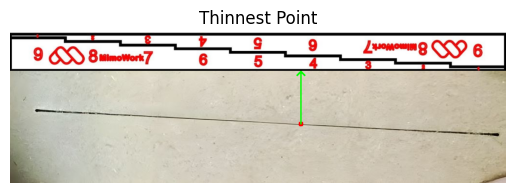

Value measured for the thinnest point on the ruler: 4


In [9]:
# Calculating and displaying the output
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('Thinnest Point')
plt.axis('off')  
plt.show()
parts = 9
width_part = line_fruler.shape[1] // parts
value = parts - (thinnest_point[0] // width_part)
print("Value measured for the thinnest point on the ruler:", value)